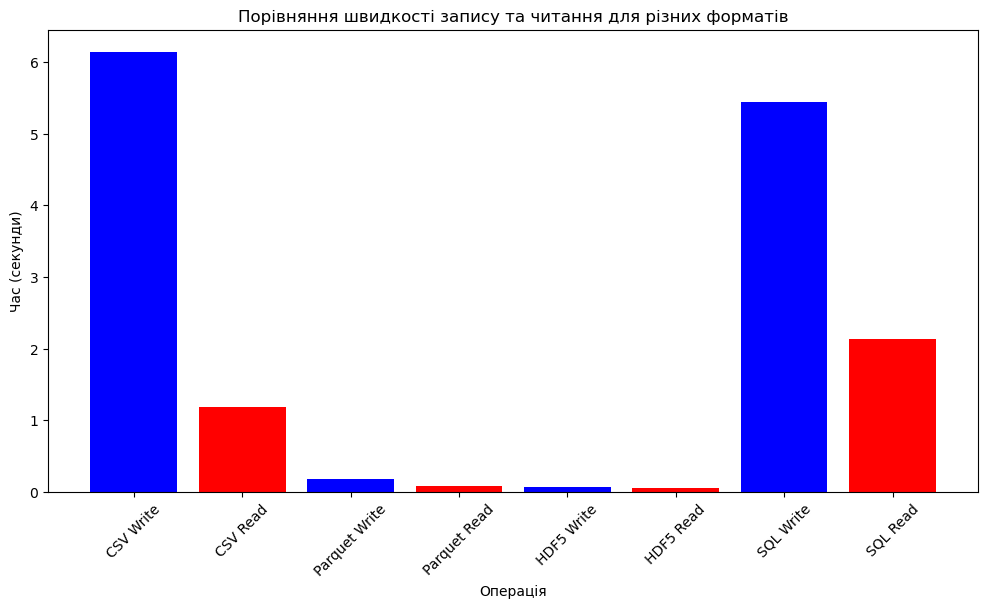

In [2]:
import time
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import h5py

# Створення великого датафрейму
np.random.seed(42)
n_rows = 1_000_000
data = {
    "timestamp": pd.date_range(start="2023-01-01", periods=n_rows, freq="min"),
    "energy_consumption": np.random.rand(n_rows) * 100,
    "temperature": np.random.rand(n_rows) * 30
}
df = pd.DataFrame(data)

# Функція для вимірювання часу виконання
def measure_time(operation, *args, **kwargs):
    start = time.time()
    operation(*args, **kwargs)
    return time.time() - start

# Вимірювання швидкості запису та читання
results = {}

# CSV
csv_file = "data.csv"
results["CSV Write"] = measure_time(df.to_csv, csv_file, index=False)
results["CSV Read"] = measure_time(pd.read_csv, csv_file)

# Parquet
parquet_file = "data.parquet"
results["Parquet Write"] = measure_time(df.to_parquet, parquet_file, engine="pyarrow")
results["Parquet Read"] = measure_time(pd.read_parquet, parquet_file, engine="pyarrow")

# HDF5
hdf5_file = "data.h5"
results["HDF5 Write"] = measure_time(df.to_hdf, hdf5_file, key="df", mode="w")
results["HDF5 Read"] = measure_time(pd.read_hdf, hdf5_file, key="df")

# SQLite
sqlite_file = "data.db"
conn = sqlite3.connect(sqlite_file)
results["SQL Write"] = measure_time(df.to_sql, "energy_data", conn, if_exists="replace", index=False)
results["SQL Read"] = measure_time(pd.read_sql, "SELECT * FROM energy_data", conn)
conn.close()

# Побудова графіка
plt.figure(figsize=(12, 6))
plt.bar(results.keys(), results.values(), color=["blue" if "Write" in key else "red" for key in results.keys()])
plt.xlabel("Операція")
plt.ylabel("Час (секунди)")
plt.title("Порівняння швидкості запису та читання для різних форматів")
plt.xticks(rotation=45)
plt.show()
